# EM502 Lab 01

## Optimality Conditions for Unconstrained Optimization Problems

In [180]:
# You will need this python libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from matplotlib import cm
import sympy as sym

In [181]:
## Define Python function
def func_1(x):
    # Constants
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    c = np.array([40, 1, 10])

    # Intermediates. Recall Python indicies start at 0
    u = x[0] - 0.8
    s = np.sqrt(1-u)
    s2 = np.sqrt(1+u)
    v = x[1] -(a[0] + a[1]*u**2*s - a[2]*u)
    alpha = -b[0] + b[1]*u**2*s2 + b[2]*u
    beta = c[0]*v**2*(1 - c[1]*v)/(1 + c[2]*u**2)
    f = alpha*np.exp(-beta)

    return f

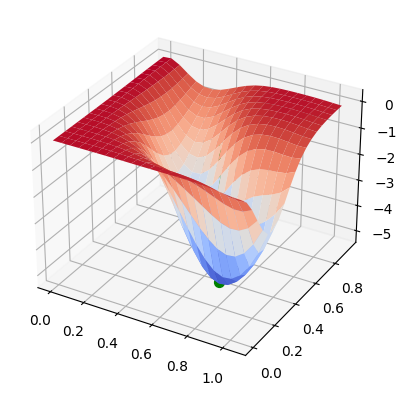

f(x*) =  -5.089256907976166 



In [182]:
## Make 3D plot to visualize
def plotFunc(func,xtest):
    x1 = np.arange(0.0,1.1,0.05)
    x2 = np.arange(0.0,1.0,0.05)
    ftest = func_1(xtest)

    # Create a matrix of all points to sample
    X1, X2 = np.meshgrid(x1, x2)
    n1 = len(x1)
    n2 = len(x2)
    F = np.zeros([n2, n1])
    xtemp = np.zeros(2)

    # Evaluate f(x) over grid
    for i in range(0,n1):
        xtemp[0] = x1[i]
        for j in range(0,n2):
            xtemp[1] = x2[j]
            F[j,i] = func(xtemp)

    # Create 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Plot f(x)
    surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True)

    # Add candidate point
    ax.scatter(xtest[0],xtest[1],ftest,s=50,color="green",depthshade=True)
    fmax = np.amax(F)
    fmin = np.amin(F)
    ax.plot([xtest[0], xtest[0]], [xtest[1], xtest[1]], [fmin,fmax],color="green")
    plt.show()


# We investigate the point that is a candidate for a minimum
xtest = np.array([0.7395, 0.3144])
plotFunc(func_1,xtest)
print("f(x*) = ",func_1(xtest),"\n")

In [183]:
## Gradient is found using the central difference approximation of the derivative
def grad_central(x,func):
    """
    Inputs:
        x - point for which to evaluate gradient

    Outputs:
        grad - gradient (vector)
        
    Assumptions:
        - func_1 is defined
        - input x has the correct number of elements for func_1
        - func_1 is continous and differentiable
    """
    eps = 1E-6
    n = len(x)
    grad = np.zeros(n)

    # if(verbose):
    #     print("***** grad_central at x = ",x,"*****")

    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps

        # Finite difference formula with central difference
        f_plus = func(x + e)
        f_minus = func(x - e)
        grad[i] = (f_plus - f_minus)/(2*eps)

    return grad


grad = grad_central(xtest,func_1)
print(grad)

[0.00390193 0.01507813]


In [184]:
## Gradient is found using the central difference approximation of the derivative
def hessian_central(x,func):
    """
    Calculate Hessian of function func_1 using central difference formula grad_central

    Inputs:
        x - point for which to evaluate gradient

    Outputs:
        H - Hessian (matrix)

    Assumptions:
        - func_1 and my_grad is defined
        - input x has the correct number of elements for func_1
        - func_1 is continous and twice differentiable
        - No mistakes in grad_centrale
    """
    eps = 1E-6
    n = len(x)
    H = np.zeros([n,n])
    
    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps
    
        # Evaluate gradient twice
        grad_plus = grad_central(x + e,func)
        grad_minus = grad_central(x - e,func)
        
        # Notice we are building the Hessian by column (or row)
        H[:,i] = (grad_plus - grad_minus)/(2*eps)
    
    return H


H = hessian_central(xtest,func_1)
print(H)

[[ 76.99973992 108.3413359 ]
 [108.3413359  392.7191905 ]]


In [185]:
# Using symbolic python to find gradient
# Define function to use with symbolic computing 
def f_1(x1,x2):
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)


# Define function to use later
def grad_exact(x,f):
    x1, x2 = sym.symbols('x1 x2')
    DerivativeOfF1 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1));
    DerivativeOfF2 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([DerivativeOfF1(x[0],x[1]),DerivativeOfF2(x[0],x[1])])
 
 
x = np.array([0.7395,0.3144])
print("The exact gradient is \n",grad_exact(x,f_1))

The exact gradient is 
 [0.00390193 0.01507813]


In [186]:
def f_1(x1,x2):
    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    b1 = 5;
    c = np.array([40, 1, 10])
    u = x1 - 0.8
    v = x2 -(a[0] + a[1]*u**2*(1-u)**0.5-a[2]*u)
    alpha = b[1]*u**2*(1+u)**0.5 + b[2]*u -b[0]
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)
    return alpha*sym.exp(-1*beta)

def hes_exact(x,f):
    x1, x2 = sym.symbols('x1 x2')
    HessianOfF11 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x1));
    HessianOfF12 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x2));
    HessianOfF21 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x1));
    HessianOfF22 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([[HessianOfF11(x[0],x[1]),HessianOfF12(x[0],x[1])],
                     [HessianOfF21(x[0],x[1]),HessianOfF22(x[0],x[1])]])
 
x = np.array([0.7395,0.3144])
print("The exact Hessian is \n",hes_exact(x,f_1)) 

The exact Hessian is 
 [[ 76.99960509 108.34139034]
 [108.34139034 392.71911223]]


In [187]:
# Computing Eiegenvalues of the Hessian Matrix 
print(" Hessian Matrix = \n",H,"\n")
l, v = linalg.eig(H)
print("Eigenvalues = ",l,"\n")
print("Eigenvectors = \n",v,"\n")

 Hessian Matrix = 
 [[ 76.99973992 108.3413359 ]
 [108.3413359  392.7191905 ]] 

Eigenvalues =  [ 43.39788177+0.j 426.32104865+0.j] 

Eigenvectors = 
 [[-0.95511731 -0.29622781]
 [ 0.29622781 -0.95511731]] 



### Activity 1
Classify each of the points given below while searching for the minimum of `f(x) = [x1^2 + (x2 + 1)^2][x1^2 + (x2 - 1)^2]`.

In [188]:
# Replace func_1
def func_2(x):
    x1,x2 = x[0],x[1]
    return (x1**2 + (x2 + 1)**2)*(x1**2 + (x2 - 1)**2)


# Replace f_1
def f_2(x1,x2):
    return (x1**2 + (x2 + 1)**2)*(x1**2 + (x2 - 1)**2)


# Classify point
def classify(point):
    plotFunc(func_2,point)
    print(f"\nGradient (Central finite difference)\n{grad_central(point,func_2)}")
    print(f"\nGradient (Exact)\n{grad_exact(point,f_2)}")
    hessian = hessian_central(point,func_2)
    print(f"\nHessian (Central finite difference)\n{hessian}")
    print(f"\nHessian (Exact)\n{hes_exact(point,f_2)}")
    eigenValues,eigenVectors = linalg.eig(hessian)
    print(f"\nEigenvalues\n{eigenValues}")
    print(f"\nEigenvectors\n{eigenVectors}")

(a) `x = [0,0]^T`

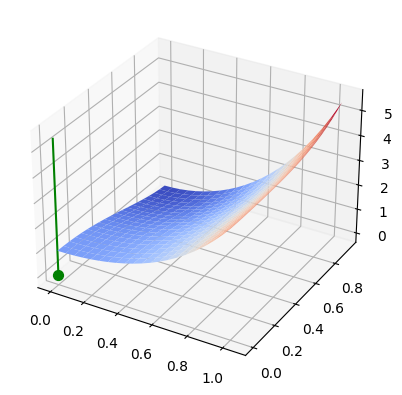


Gradient (Central finite difference)
[0. 0.]

Gradient (Exact)
[0 0]

Hessian (Central finite difference)
[[ 3.99991151  0.        ]
 [ 0.         -3.99991151]]

Hessian (Exact)
[[ 4  0]
 [ 0 -4]]

Eigenvalues
[ 3.99991151+0.j -3.99991151+0.j]

Eigenvectors
[[1. 0.]
 [0. 1.]]


In [189]:
classify(np.array([0,0]))

(b) `x = [0,1]^T`

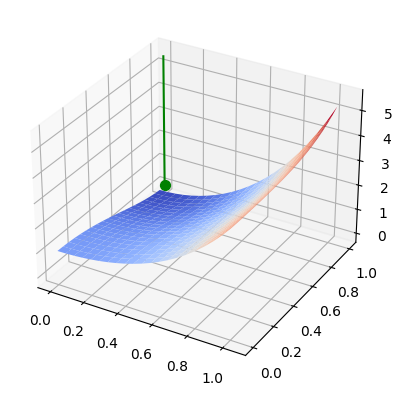


Gradient (Central finite difference)
[0.00000000e+00 3.99955591e-12]

Gradient (Exact)
[0 0]

Hessian (Central finite difference)
[[8. 0.]
 [0. 8.]]

Hessian (Exact)
[[8 0]
 [0 8]]

Eigenvalues
[8.+0.j 8.+0.j]

Eigenvectors
[[1. 0.]
 [0. 1.]]


In [190]:
classify(np.array([0,1]))

(c) `x = [0,-1]^T`

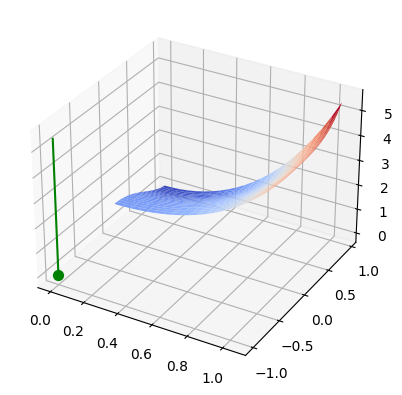


Gradient (Central finite difference)
[ 0.00000000e+00 -3.99955591e-12]

Gradient (Exact)
[0 0]

Hessian (Central finite difference)
[[8. 0.]
 [0. 8.]]

Hessian (Exact)
[[8 0]
 [0 8]]

Eigenvalues
[8.+0.j 8.+0.j]

Eigenvectors
[[1. 0.]
 [0. 1.]]


In [191]:
classify(np.array([0,-1]))

(d) `x = [1,1]^T`

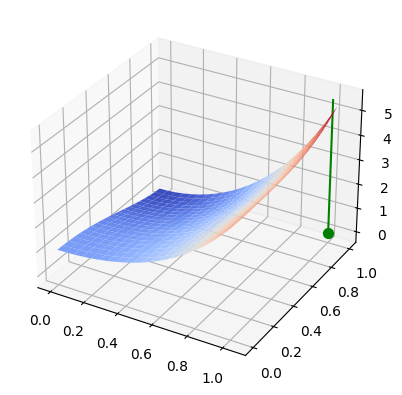


Gradient (Central finite difference)
[12.  4.]

Gradient (Exact)
[12  4]

Hessian (Central finite difference)
[[19.99933552  8.00004507]
 [ 8.00004507 11.99951249]]

Hessian (Exact)
[[20  8]
 [ 8 12]]

Eigenvalues
[24.94369666+0.j  7.05515136+0.j]

Eigenvectors
[[ 0.85064789 -0.52573583]
 [ 0.52573583  0.85064789]]


In [192]:
classify(np.array([1,1]))